In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import time
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from bs4 import BeautifulSoup
from selenium.webdriver.chrome.options import Options
from IPython.display import clear_output
import pickle
from datetime import datetime
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
f = open('BigBasketData.json')
data = json.load(f)
f.close()

<==========Companies with 50 or more products selling on BB=============>
 Please refer to the individual product information given above
 71
Papas Trading Pvt ltd 100
 Kaira District Co-operative Milk Producers' Union Limited 50
 1. Procter & Gamble Home Products Pvt. Ltd. 52
 Bangalore Papa's Trading No 39/40 93
 Hindustan Unilever Limited 107
 Please refer to the individual product information given above 150
 WINGREENS FARMS PVT LTD 67
 Munchkin 54
 Bigbasket Country of origin 54
 Hindustan Unilever Ltd 56
 Bliss Chocolates India Pvt Ltd No 52
 NESTLE INDIA LIMITED 84
 Johnson & Johnson Pvt. Ltd.  61
 ITC Limited 62


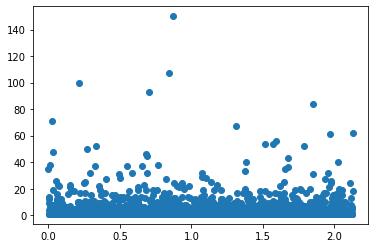

In [6]:
sellers = []
frequent_sellers = []
for prd in data:
    sellers.append(prd['seller_name'])

xpoints = []
ypoints = []
print('<==========Companies with 50 or more products selling on BB=============>')
for idx,slr in enumerate(set(sellers)):
    
   
    if slr is None:
        continue
    
    if sellers.count(slr) >=50:
        print(slr,sellers.count(slr))
        frequent_sellers.append(slr)
        
        
    xpoints.append(idx/1000)
    ypoints.append(sellers.count(slr))


plt.plot(xpoints, ypoints, 'o')
plt.show()

In [12]:
fs_dat = []
for fs in frequent_sellers:
    sum_dprice = 0
    sum_discount = 0
    sum_rating = 0
    
    dprice_c = 0 
    discount_c = 0
    rating_c = 0
    for x in data:
        if x['seller_name'] == fs:
            
            if x['discounted_price'] != -1:
                sum_dprice += x['discounted_price']
                dprice_c += 1
            
            if x['discount'] != 0:
                sum_discount += x['discount']
                discount_c += 1
                    
            if x['rating'] != 0:
                sum_rating += x['rating']
                rating_c += 1
                
    if dprice_c == 0:
        dprice_c = 1
    if discount_c == 0 :
        discount_c = 1
    if rating_c == 0:
        rating_c =1
        
    fs_dat.append({"Seller": fs, "Average Discounted/Selling Price" : sum_dprice/dprice_c ,
                   "Average Discount": sum_discount/discount_c ,
                   "Average Rating":sum_rating/rating_c})
    

## Frequent Sellers and their label mapping

0. Please refer to the individual product information given above <br>
1. Papas Trading Pvt ltd <br>
2. Kaira District Co-operative Milk Producers' Union Limited <br>
3. 1. Procter & Gamble Home Products Pvt. Ltd. <br>
4. Bangalore Papa's Trading No 39/40 <br>
5. Hindustan Unilever Limited <br>
6. Please refer to the individual product information given above <br>
7.  WINGREENS FARMS PVT LTD <br>
8. Munchkin <br>
9. Bigbasket Country of origin <br>
10. Hindustan Unilever Ltd <br>
11. Bliss Chocolates India Pvt Ltd No <br>
12. NESTLE INDIA LIMITED <br>
13. Johnson & Johnson Pvt. Ltd. <br>
14. ITC Limited <br>

*Note that Frequent Sellers is defined by Companies/Sellers with more than 50 products on BigBasket*

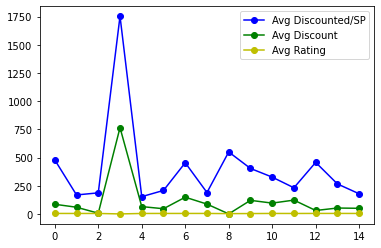

In [26]:
y1 = [x['Average Discounted/Selling Price'] for x in fs_dat]
y2 = [x['Average Discount'] for x in fs_dat]
y3 = [x['Average Rating'] for x in fs_dat]

plt.plot(y1,marker='o', color='b')
plt.plot(y2,marker='o', color='g')
plt.plot(y3,marker='o', color='y')
plt.legend(["Avg Discounted/SP", "Avg Discount","Avg Rating"], loc ="upper right")
plt.show()
